In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import statistics as stats
from sklearn.model_selection import GridSearchCV
from random import sample
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error

In [2]:
Train_multi= pd.read_csv('Train_multiclass.csv')
Test_multi= pd.read_csv('Test_multiclass.csv')

X_train_multi=Train_multi.drop(['Multiple label', 'Binary label','ID'], axis = 1) 
y_train_multi=Train_multi['Multiple label']
X_test_multi=Test_multi.drop(['Multiple label', 'Binary label','ID'], axis = 1)
y_test_multi=Test_multi['Multiple label']

In [3]:
clf= tree.DecisionTreeClassifier()
modelo_base=clf.fit(X_train_multi,y_train_multi)

Next, the search for parameters is carried out: maximum depth and minimum number of cases in each node. With this, it is sought to maximize the accuracy of the model (accuracy).

In [4]:
max_depth=range(1,20)
min_samples_leaf=range(10,100)

param = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}
tree_grid = GridSearchCV(clf, param_grid=param, scoring= 'accuracy', n_jobs=-1)
tree_grid.fit(X_train_multi,y_train_multi)
best_parameters = tree_grid.best_params_

In [5]:
#Classifier with the best parameters
tree_clf=tree_grid.best_estimator_

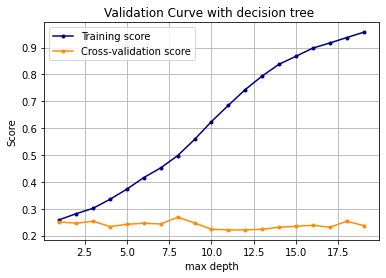

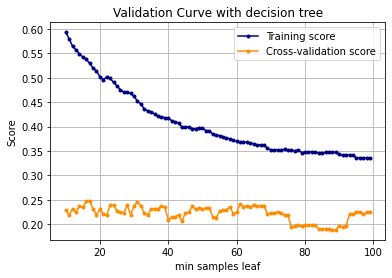

In [6]:
#max depth
train_scores, test_scores = validation_curve(clf, X_train_multi, y_train_multi, param_name="max_depth", param_range=max_depth, cv=5, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.title("Validation Curve with decision tree ")
plt.xlabel('max depth')
plt.ylabel("Score")

plt.plot(max_depth, train_scores_mean, label="Training score",color="navy",marker='.')
plt.plot(max_depth, test_scores_mean, label="Cross-validation score",color="darkorange",marker='.')
plt.grid()
plt.legend(loc="best")
plt.savefig('Image/max_depth_multiple.png' )
plt.show()

#min samples leaf
train_scores, test_scores = validation_curve(clf, X_train_multi, y_train_multi, param_name="min_samples_leaf", param_range=min_samples_leaf,cv=5, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve with decision tree")
plt.xlabel('min samples leaf')
plt.ylabel("Score")

plt.plot(min_samples_leaf, train_scores_mean, label="Training score",color="navy",marker='.')
plt.plot(min_samples_leaf, test_scores_mean, label="Cross-validation score",color="darkorange",marker='.')
plt.grid()
plt.legend(loc="best")
plt.savefig('Image/min_samples_leaf_multiple.png' )
plt.show()

In [13]:
print('The parameters selected by the GridSearch function are:',best_parameters)

The parameters selected by the GridSearch function are: {'max_depth': 8, 'min_samples_leaf': 16}


In [8]:
print("Base model hit rate:",modelo_base.score(X_test_multi,y_test_multi))
print("Model hit rate with the search for parameters:",tree_clf.score(X_test_multi,y_test_multi))

#Mejora
print('Improved: {:0.2f}%.'.format( 100 * (tree_clf.score(X_test_multi,y_test_multi) - modelo_base.score(X_test_multi,y_test_multi)) / modelo_base.score(X_test_multi,y_test_multi)))

Base model hit rate: 0.211340206185567
Model hit rate with the search for parameters: 0.21649484536082475
Improved: 2.44%.


In [14]:
predict = tree_clf.predict(X_test_multi)

acc_test= tree_clf.score(X_test_multi, y_test_multi).round(4)
acc_train= tree_clf.score(X_train_multi, y_train_multi).round(4)
print('The accuracy for the decision tree model in the TEST set is:', acc_test,'\n')
print('The accuracy for the decision tree model in the TRAIN set is:', acc_train,'\n')

print("Confusion Matrix")
print(confusion_matrix(y_test_multi, predict),'\n')
print("================Classification Report=================")
print(classification_report(y_test_multi, predict))

The accuracy for the decision tree model in the TEST set is: 0.2165 

The accuracy for the decision tree model in the TRAIN set is: 0.3772 

Confusion Matrix
[[ 9 11  2 12 16]
 [ 6  9  1  8 12]
 [ 4 10  2  9 18]
 [ 4  1  0  3 16]
 [ 4 12  1  5 19]] 

================Classification Report=================
              precision    recall  f1-score   support

         0.0       0.33      0.18      0.23        50
         1.0       0.21      0.25      0.23        36
         2.0       0.33      0.05      0.08        43
         3.0       0.08      0.12      0.10        24
         5.0       0.23      0.46      0.31        41

    accuracy                           0.22       194
   macro avg       0.24      0.21      0.19       194
weighted avg       0.26      0.22      0.20       194



In [15]:
matriz_confusion=pd.crosstab(y_test_multi,predict, rownames=['Predicted class'], colnames=['Classification result'])
matriz_confusion

Classification result,0.0,1.0,2.0,3.0,5.0
Predicted class,,,,,
0.0,9,11,2,12,16
1.0,6,9,1,8,12
2.0,4,10,2,9,18
3.0,4,1,0,3,16
5.0,4,12,1,5,19


Below is an example of predicted versus actual sleep phases. To facilitate this visualization, half of the samples of the test subset are shown.

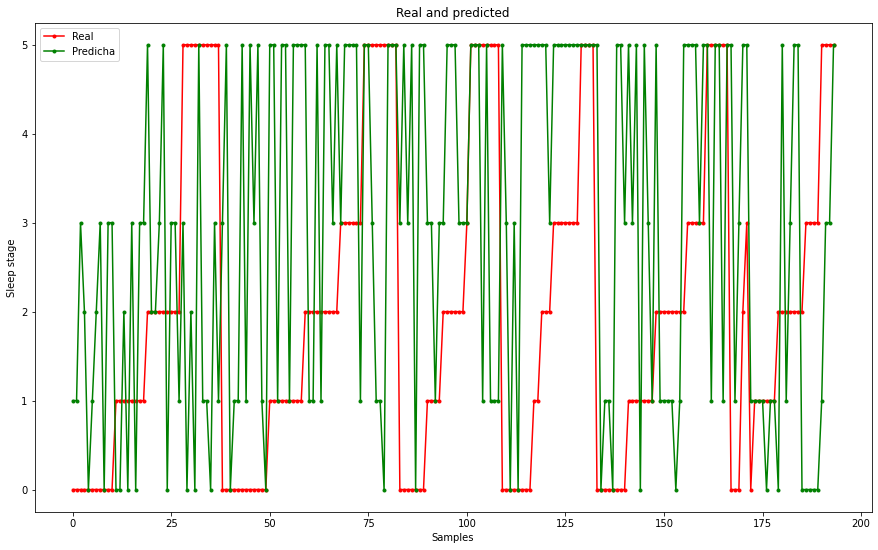

In [16]:
pacientes = len(y_test_multi)
t = np.arange(0,pacientes)
plt.figure(figsize=(15,9))
plt.plot(t,y_test_multi,color='red', marker='.',label='Real')
plt.plot(t,predict,color='green', marker='.',label='Predicha')

plt.title('Real and predicted')
plt.xlabel('Samples')
plt.ylabel('Sleep stage')
plt.legend()
plt.savefig('Image/DT_multiple.png')

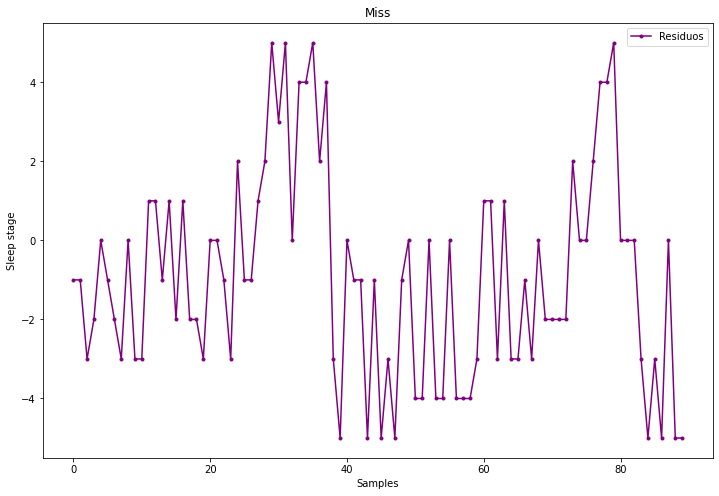

In [12]:
miss= y_test_multi - predict
plt.figure(figsize=(12,8))
plt.plot(miss[0:90],color='purple', marker='.',label='Residuos')

plt.title('Miss')
plt.xlabel('Samples')
plt.ylabel('Sleep stage')
plt.legend()